## Domaći zadatak 3 - Veštačke neuronske mreže
Studenti:

Đurađ Gvozdenović 1329

Vesna Stojanović 1339

#### Data set

Korišćeni data set se nalazi na sledećem linku: https://www.kaggle.com/joshmcadams/oranges-vs-grapefruit?fbclid=IwAR1SdPvl0FFBy7LGacJ8zZDZMNOHJ--64e-M4A9Lfgf6J0gbCFPScYXTywc


### Importovanje potrebnih paketa za rad sa veštačkim neuronskim mrežama

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import losses
import keras.backend as K
import tensorflow.keras.backend as kb

### Ucitavanje skupa podataka

In [102]:
data_df = pd.read_csv("/home/djura/Desktop/citrus.csv")

### Deskriptivna analiza podataka

In [41]:
data_df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [43]:
data_df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


### Provera null vrednosti

In [42]:
data_df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

### Histogrami

array([[<AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'red'}>,
        <AxesSubplot:title={'center':'green'}>],
       [<AxesSubplot:title={'center':'blue'}>, <AxesSubplot:>]],
      dtype=object)

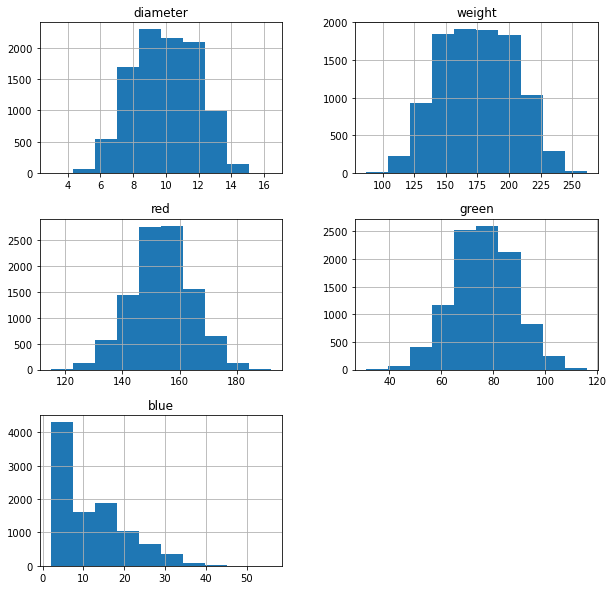

In [44]:
data_df.hist(figsize=(10,10))

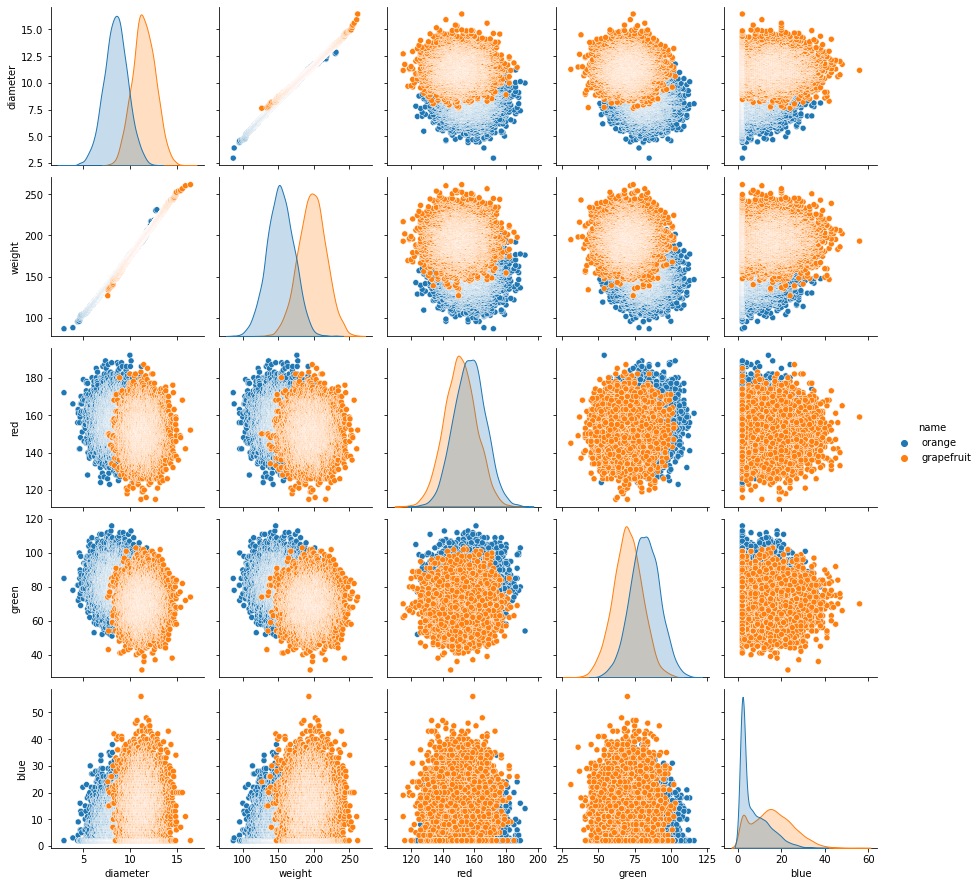

In [52]:
sns.pairplot(data_df,hue='name')

### Matrica korelacije atributa

<AxesSubplot:>

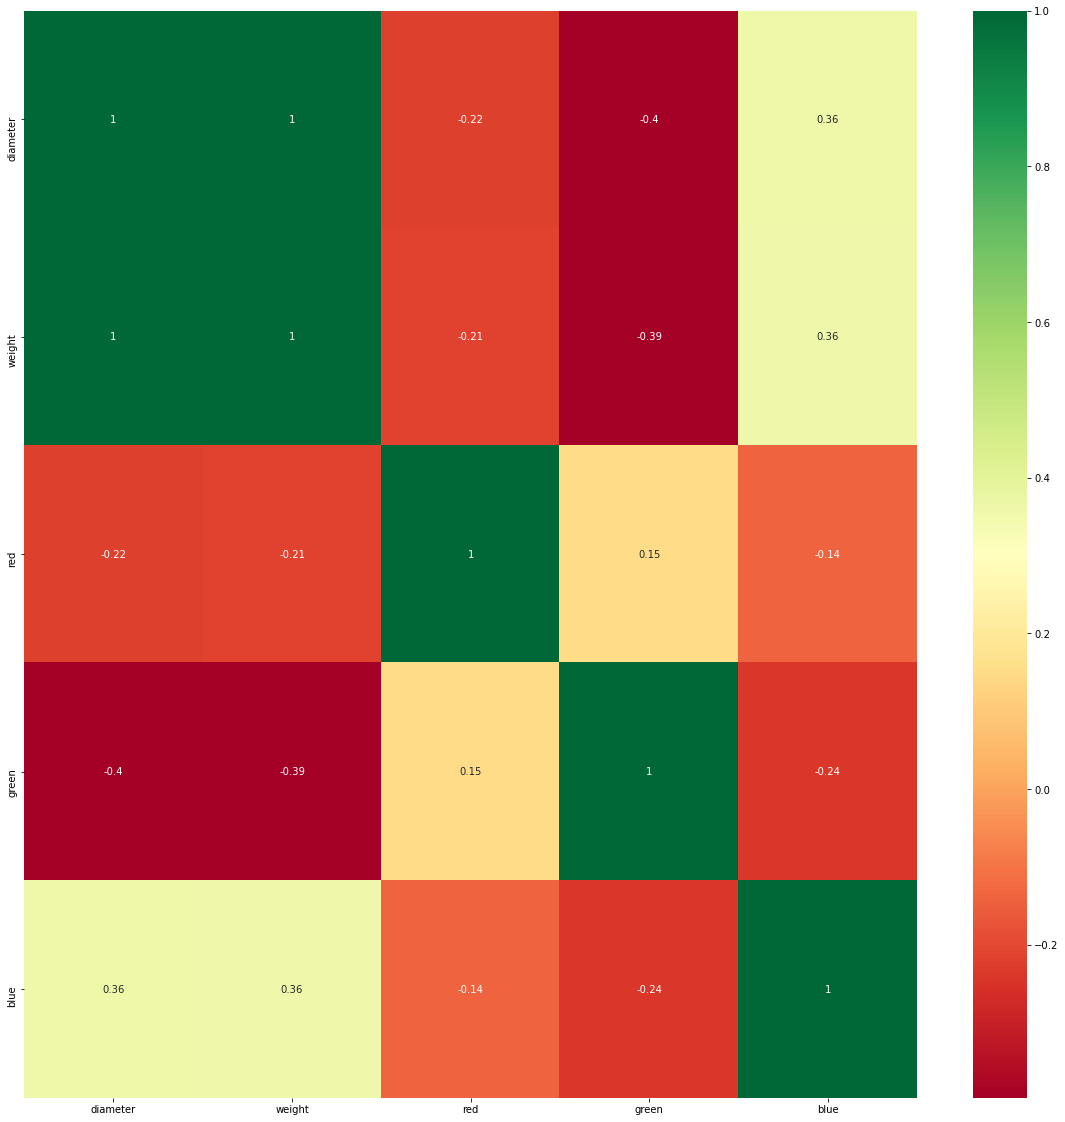

In [53]:
corrmat = data_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Izbacivanje atributa weight na osnovu matrice korelacije

In [103]:
data_df.pop("weight")

0        86.76
1        88.05
2        95.17
3        95.60
4        95.76
         ...  
9995    253.89
9996    254.67
9997    256.50
9998    260.14
9999    261.51
Name: weight, Length: 10000, dtype: float64

### Treniranje modela

#### Binary crossentropy loss funkcija

In [46]:
model =  keras.Sequential()
model.add(layers.Dense(24, activation='relu', input_shape=(4,)))
model.add(layers.Dense(23, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy',   optimizer="adam", metrics=['accuracy'])
# keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 24)                120       
                                                                 
 dense_4 (Dense)             (None, 23)                575       
                                                                 
 dense_5 (Dense)             (None, 1)                 24        
                                                                 
Total params: 719
Trainable params: 719
Non-trainable params: 0
_________________________________________________________________


In [90]:
y = data_df.pop('name')
X = data_df
y = y.replace("orange", 0)
y = y.replace("grapefruit", 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [48]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=10,                                   
                    validation_data=(X_test, y_test),
                    verbose = 0)

In [49]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.1977 - accuracy: 0.9165


[0.19774062931537628, 0.9164999723434448]

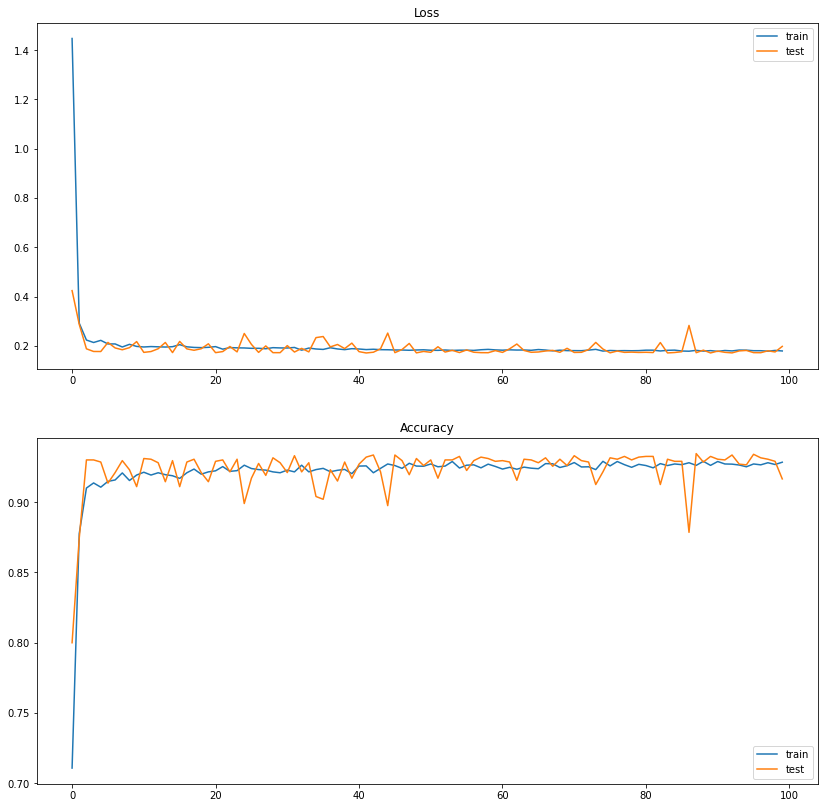

In [50]:
plt.figure(figsize = (14,14))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### Hinge loss funkcija

In [95]:
model =  keras.Sequential()
model.add(layers.Dense(14, activation='relu', input_shape=(4,)))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))

model.summary()
model.compile(loss=losses.Hinge(),   optimizer='adam', metrics=['accuracy'])
# keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 14)                70        
                                                                 
 dense_86 (Dense)            (None, 14)                210       
                                                                 
 dense_87 (Dense)            (None, 1)                 15        
                                                                 
Total params: 295
Trainable params: 295
Non-trainable params: 0
_________________________________________________________________


In [96]:
y = data_df.pop('name')
X = data_df
y = y.replace("orange", 1)
y = y.replace("grapefruit", -1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [98]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=10,                                   
                    validation_data=(X_test, y_test),
                    verbose = 0)

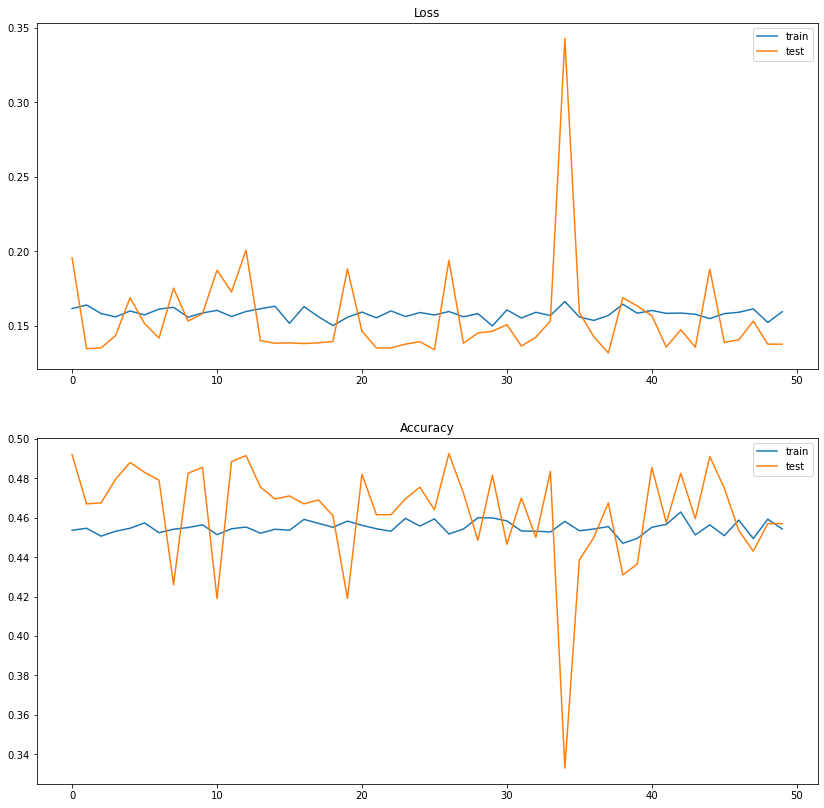

In [99]:
plt.figure(figsize = (14,14))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### SquaredHinge loss funkcija

In [107]:
model =  keras.Sequential()
model.add(layers.Dense(14, activation='relu', input_shape=(4,)))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))

model.summary()
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss=losses.SquaredHinge(),   optimizer=opt, metrics=['accuracy'])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 14)                70        
                                                                 
 dense_95 (Dense)            (None, 14)                210       
                                                                 
 dense_96 (Dense)            (None, 1)                 15        
                                                                 
Total params: 295
Trainable params: 295
Non-trainable params: 0
_________________________________________________________________


In [105]:
y = data_df.pop('name')
X = data_df
y = y.replace("orange", 1)
y = y.replace("grapefruit", -1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [109]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=10,                                   
                    validation_data=(X_test, y_test),
                    verbose = 0)

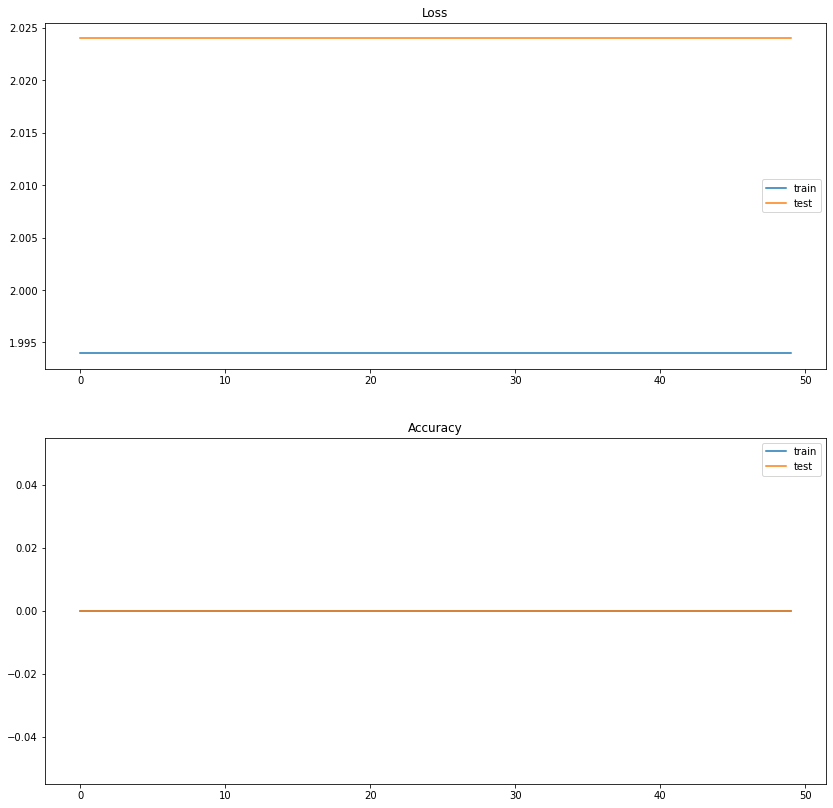

In [110]:
plt.figure(figsize = (14,14))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [3]:
data_df = data_df.replace("orange", 0)
data_df = data_df.replace("grapefruit", 1)

### Outlier detection

U primeru ispod prikazane su dve metode sa detekciju outliera: na osnovu IQR-a i 3 standardne devijacije. IQR - inter kvartilni opseg pretstavlja razliku izmedju vrednostu prvog i treceg kvartila i koristi se kako bi se odredile donja i gorna granica za detekciju outlier-a. Standardna devijacija - prosecno odstupanje od prosecne vrednosti. Ukoliko skup podataka ima normalnu raspodelu u intervalu [mean - 3std, mean + 3std] naci ce se 99,7% vrednosti. Ovo pravilo je moguce iskoristiti za eliminaciju preostalih 0,3 procenta vrednosti koje pretstavljaju outlier-e.

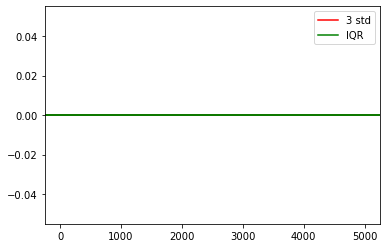

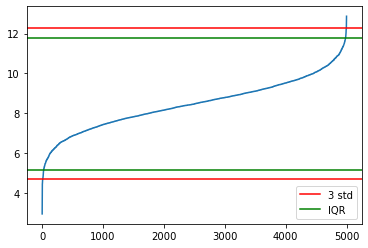

/home/djura/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


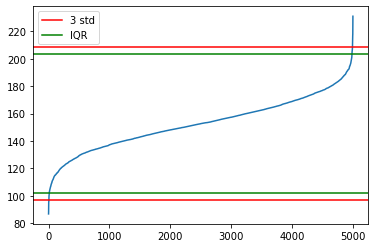

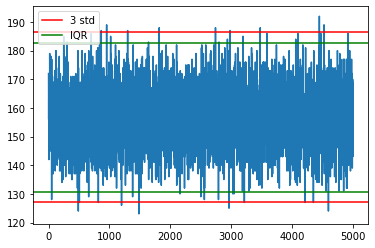

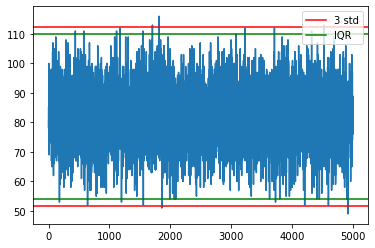

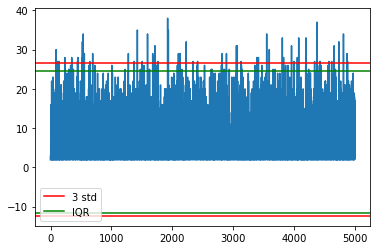

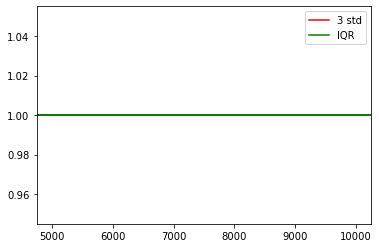

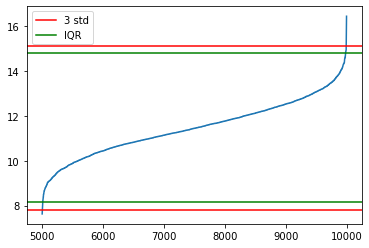

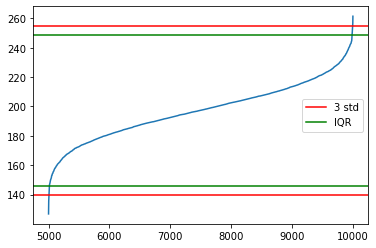

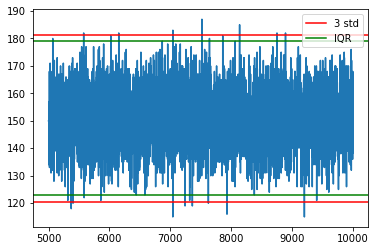

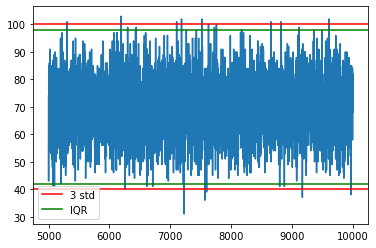

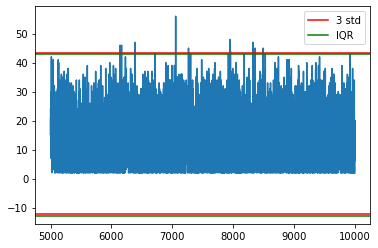

In [4]:
classes = data_df["name"]
for class_val in set(classes):
    class_mask = [elem == class_val for elem in classes]


    fearure_df = data_df.iloc[class_mask, :]
    original_data_class = data_df.iloc[class_mask, :]

    for i in range(fearure_df.shape[1]):

        feature = fearure_df.iloc[:, i]
        mean = feature.mean()
        std = feature.std()

        upper_limit = mean+3*std
        lower_limit = mean-3*std

        q1, q3 = np.percentile(feature, [25, 75])
        iqr = q3 - q1
        lower_bound_1 = q1 - (iqr * 1.5)
        upper_bound_1 = q3 + (iqr * 1.5)

        plt.figure()
        plt.plot(feature)
        plt.axhline(y=upper_limit, color='r', linestyle='-', label = "3 std")
        plt.axhline(y=lower_limit, color='r', linestyle='-')

        plt.axhline(y=lower_bound_1, color='g', linestyle='-', label = "IQR")
        plt.axhline(y=upper_bound_1, color='g', linestyle='-')
        plt.legend()
        plt.show()

        for j in range(len(feature)):
            if feature.values[j] > upper_limit:
                fearure_df.iloc[j,i] = None
                original_data_class.iloc[j,i] = None
            if feature.values[j] < lower_limit:
                fearure_df.iloc[j,i] = None
                original_data_class.iloc[j,i] = None
        data_df.iloc[class_mask, :] = fearure_df
        data_df.iloc[class_mask, :] = original_data_class
data_df = data_df.dropna()
data_df = data_df.dropna()

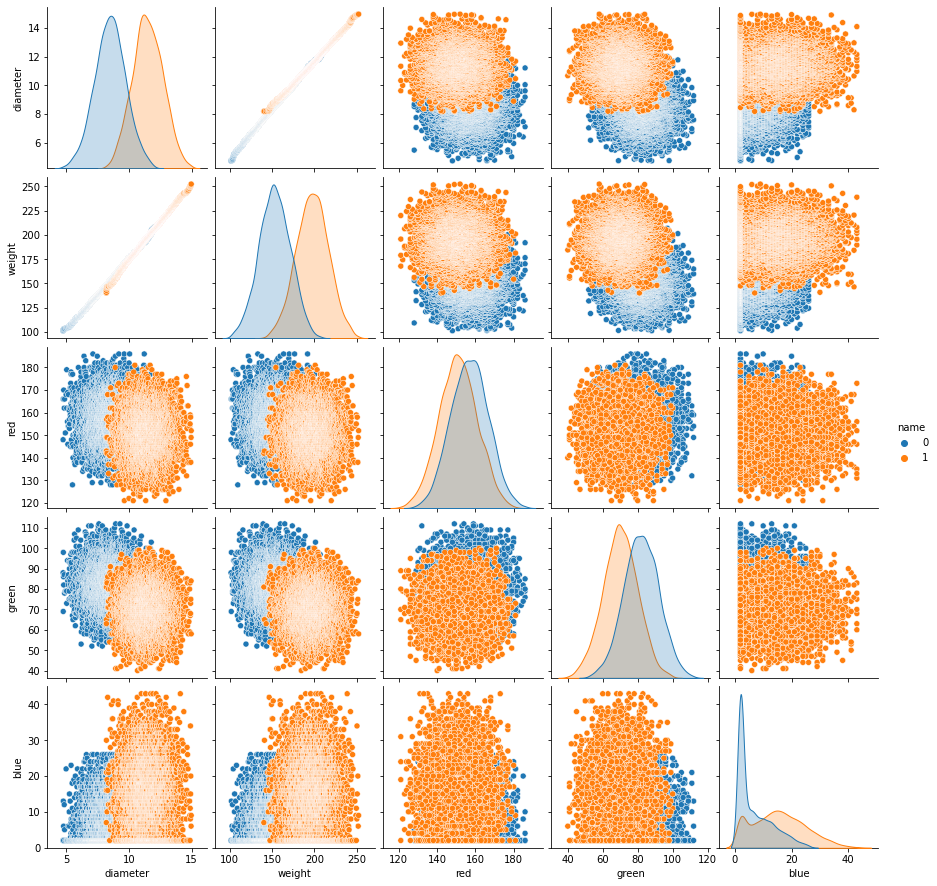

In [42]:
sns.pairplot(data_df,hue='name')

In [11]:
model =  keras.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(4,)))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy',   optimizer="adam", metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [115]:
y = data_df.pop('name')
X = data_df
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [12]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=10,                                   
                    validation_data=(X_test, y_test),
                    verbose = 0)

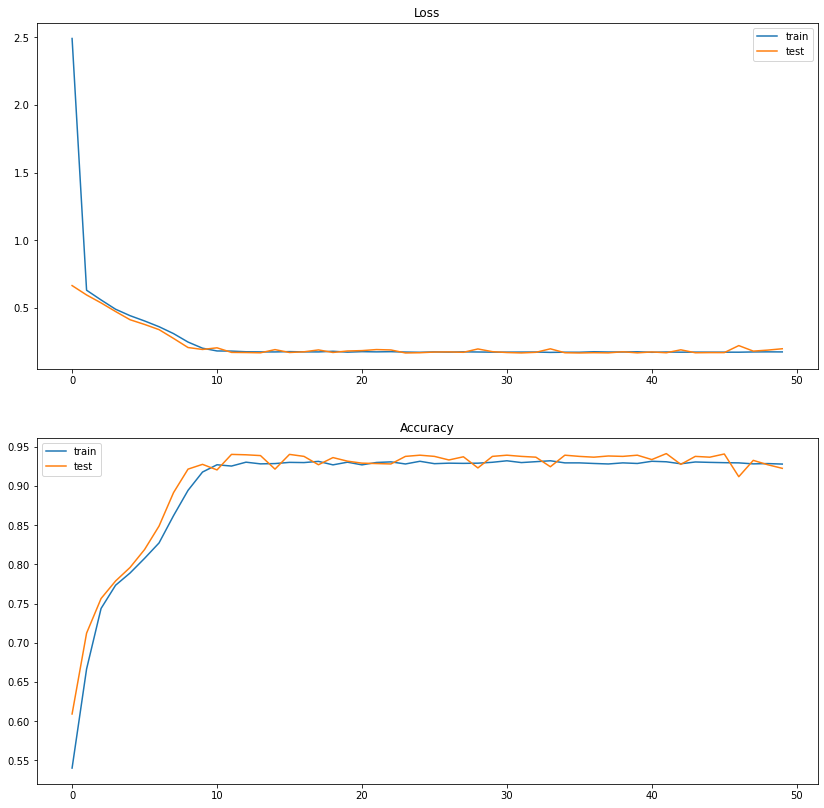

In [13]:
plt.figure(figsize = (14,14))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [14]:
model.evaluate(X_test, y_test)

62/62 [==============================] - 0s 1ms/step - loss: 0.1954 - accuracy: 0.9223


[0.19537830352783203, 0.9223350286483765]

### Grid search

In [50]:
def create_model(n_neurons, n_layers):
    model = keras.Sequential()
    for i in range(n_layers):
        model.add(layers.Dense(n_neurons, activation='relu', input_shape=(4,))) 
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [53]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, initial_epoch=0, verbose=0)

neurons=list(range(2,10))
layes = list(range(2,7))

param_grid = dict(n_neurons=neurons, n_layers = layes)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-53-57a84123cc4d>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, initial_epoch=0, verbose=0)


Best: 0.933351 using {'n_layers': 4, 'n_neurons': 5}
0.667247 (0.214629) with: {'n_layers': 2, 'n_neurons': 2}
0.753723 (0.220506) with: {'n_layers': 2, 'n_neurons': 3}
0.932970 (0.001895) with: {'n_layers': 2, 'n_neurons': 4}
0.932208 (0.002757) with: {'n_layers': 2, 'n_neurons': 5}
0.922811 (0.013223) with: {'n_layers': 2, 'n_neurons': 6}
0.931954 (0.003265) with: {'n_layers': 2, 'n_neurons': 7}
0.925100 (0.005734) with: {'n_layers': 2, 'n_neurons': 8}
0.932462 (0.004971) with: {'n_layers': 2, 'n_neurons': 9}
0.577273 (0.178369) with: {'n_layers': 3, 'n_neurons': 2}
0.846421 (0.172919) with: {'n_layers': 3, 'n_neurons': 3}
0.751876 (0.215153) with: {'n_layers': 3, 'n_neurons': 4}
0.753219 (0.212905) with: {'n_layers': 3, 'n_neurons': 5}
0.923320 (0.017906) with: {'n_layers': 3, 'n_neurons': 6}
0.839948 (0.181719) with: {'n_layers': 3, 'n_neurons': 7}
0.926370 (0.010853) with: {'n_layers': 3, 'n_neurons': 8}
0.928271 (0.008382) with: {'n_layers': 3, 'n_neurons': 9}
0.490035 (0.015628)

### Custom loss funkcija 

In [6]:
def custom_loss_function(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    custom_loss=kb.square(y_true-y_pred)
    return custom_loss

In [7]:
model = keras.Sequential()
for i in range(4):
    model.add(layers.Dense(5, activation='relu', input_shape=(4,))) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss=custom_loss_function, optimizer='adam', metrics=['accuracy'])

In [8]:
y = data_df.pop('name')
X = data_df
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [11]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=10,                                   
                    validation_data=(X_test, y_test),
                    verbose = 0)

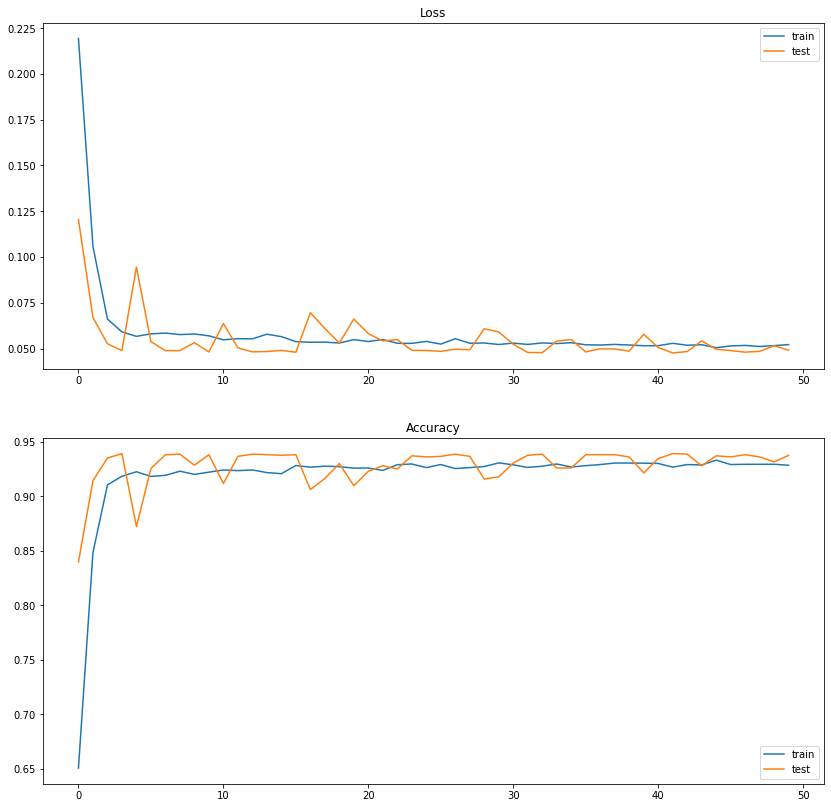

In [12]:
plt.figure(figsize = (14,14))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [13]:
model.evaluate(X_test, y_test)

62/62 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9376


[0.04907942935824394, 0.9375634789466858]

### Callback

In [9]:
ACCURACY_THRESHOLD = 0.93

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, stopping training" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True


callbacks = myCallback()

In [10]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=10,                                   
                    validation_data=(X_test, y_test),
                    verbose = 0, 
                    callbacks=[callbacks])


Reached 93.00% accuracy, stopping training


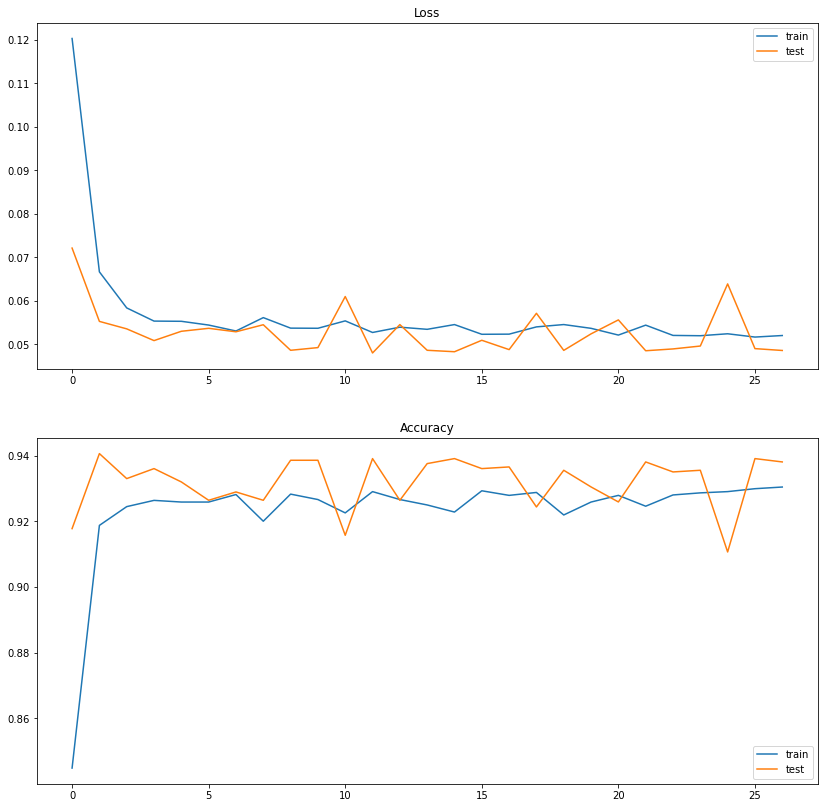

In [11]:
plt.figure(figsize = (14,14))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [12]:
model.evaluate(X_test, y_test)

62/62 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9381


[0.048592112958431244, 0.938071072101593]

### Zaključak

U okviru ovog domaćeg zadatka je prikazana binarna klasifikacija instanci na pomarandze i grejpfrute korišćenem veštačkih neuronskih mreža. Neuronske mreže su trenirane sa različitim loss funkcijama kao što su: Binary crossentropy, Hinge, SquaredHinge i Custom loss funkcija. Uz pomoć grid search-a je izabrana konfiguracija neuronske mreže koja daje najbolje rezultate. Iskorišćen je takođe callback mehanizam kako bi se zaustavilo treniranje mreže kada se dostigne određena preciznost. 